1. 이미지 처리
2. 이미지 필터링
3. 이미지 변환
4. 이미지 특징 추출

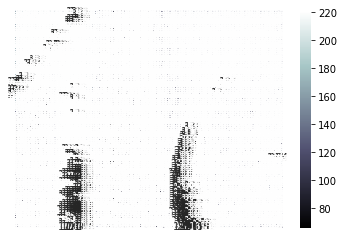

In [14]:
# 1. 이미지 처리
import cv2
import matplotlib.pylab as plt
import seaborn as sns

img = cv2.imread('C:\\open_img\\myImg\\Lenna.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sns.heatmap(img_gray[:100, :100], annot=True, fmt="d", cmap=plt.cm.bone)
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'G Channel [1]')

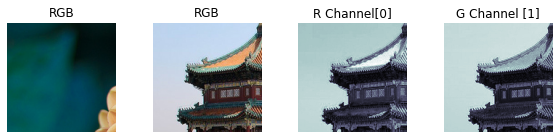

In [25]:
# 1-2. 이미지 처리_사이킷런에서 제공해주는 샘플 이미지를 호출
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pylab as plt
import seaborn as sns

dataset = load_sample_images()   
# print(type(dataset))  #<class 'sklearn.utils.Bunch'>
len(dataset.images)
img_rgb = dataset.images[1]
img_rgb2 = dataset.images[0]
plt.figure(figsize=(10,2))

plt.subplot(141) #141 : 1행 4개의 그림 중 첫번째
plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB")

plt.subplot(142) #141 : 1행 4개의 그림 중 첫번째
plt.imshow(img_rgb2[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB")

plt.subplot(143) 
plt.imshow(img_rgb2[50:200, 50:200, 0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R Channel[0]")

plt.subplot(144) 
plt.imshow(img_rgb2[50:200, 50:200, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G Channel [1]")


Text(0.5, 1.0, 'B Channel [2]')

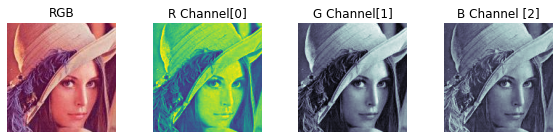

In [28]:
# 1-3. 이미지 처리_opencv 로 이미지를 호출
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pylab as plt
import seaborn as sns

img = cv2.imread('C:\\open_img\\myImg\\Lenna.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,2))

plt.subplot(141) #141 : 1행 4개의 그림 중 첫번째
plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB")

plt.subplot(142) #141 : 1행 4개의 그림 중 첫번째
plt.imshow(img_rgb[50:200, 50:200, 0])
plt.axis("off")
plt.title("R Channel[0]")

plt.subplot(143) 
plt.imshow(img_rgb[50:200, 50:200, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G Channel[1]")

plt.subplot(144) 
plt.imshow(img_rgb[50:200, 50:200, 2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B Channel [2]")


In [17]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg')   
print(china.dtype)
print(china.shape)  

flower = load_sample_image('flower.jpg') 
print(flower.dtype)
print(flower.shape)

uint8
(427, 640, 3)
uint8
(427, 640, 3)


Text(0.5, 1.0, 'img_res_hsv')

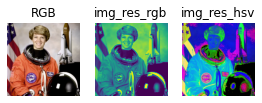

In [41]:
# 1-4. scikit-image 패키지 모듈의 이미지를 확인 해보자
import skimage
import cv2
import matplotlib.pylab as plt
import seaborn as sns
from skimage import color

skimage.__version__
img = skimage.data.astronaut()
img.shape

plt.subplot(141) 
plt.imshow(img)
plt.axis("off")
plt.title("RGB")

# 이미지를 가져와 저장 후 다시 읽어보자
skimage.io.imsave("astronaut.png",img)
img_res = skimage.io.imread("astronaut.png")

plt.subplot(142) 
plt.imshow(color.rgb2gray(img_res))
plt.axis("off")
plt.title("img_res_rgb")

plt.subplot(143) 
plt.imshow(color.rgb2hsv(img_res))
plt.axis("off")
plt.title("img_res_hsv")

Text(0.5, 1.0, 'img_rgb')

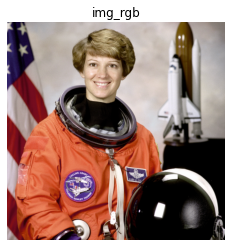

In [47]:
# 1-5. 샘플을 저장한 것을 opencv로 호출해보자
import cv2

image = cv2.imread("astronaut.png")

# 각 채널을 분리
b, g, r = cv2.split(image)
# b, r 바꾸기
img_rgb = cv2.merge([r,g,b])

plt.subplot(111) 
plt.imshow(img_rgb)
plt.axis("off")
plt.title("img_rgb")


2. 이미지 필터링 : 화소 행렬을 다른 값으로 변경하는 것
   ex. 임계값, 적응임계, 필터링, 블러링, 변환

- threshold(src, thresh, maxval, type[, dst]) -> retval, dst  -> 하나의 픽셀값을 기준값을 이용하여 이진화
- type : 기준값이 있으면 기준값으로 처리!
- THRESH_BINARY : 기준값을 넘으면 최대값으로 지정하거나 0으로 지정
- THRESH_BINARY_INV : 기준값을 넘으면 0 아니면 최대값
- THRESH_TRUNC : 기준값을 넘으면 기준값 또는 최대값
- THRESH_TOZERO : 기준값을 넘으면 원래값 아니면 0
- THRESH_TOZERO_INV : 기준값을 넘으면 0 아니면 원래값


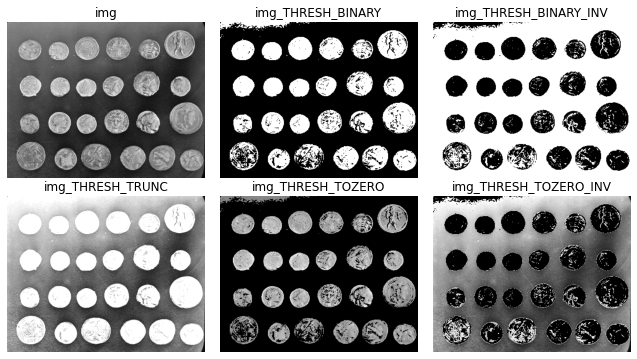

In [53]:
# 2-1. threshold를 사용하자
import skimage
import cv2
import matplotlib.pylab as plt
import seaborn as sns
from skimage import color
from skimage.data import coins

img = coins()
img.shape
maxval = 255
thresh = maxval / 2

ret, th01 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
ret, th02 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
ret, th03 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)
ret, th04 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)
ret, th05 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV)

title = ["img","img_THRESH_BINARY", "img_THRESH_BINARY_INV", "img_THRESH_TRUNC", "img_THRESH_TOZERO", "img_THRESH_TOZERO_INV"]
images = [img, th01, th02, th03, th04, th05]

plt.figure(figsize=(9,5))
for i in range(6):
    # 두줄, 한줄에 3개씩 출력, 그레이로
    plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.axis("off")
    
plt.tight_layout(pad=0.9) #이미지 사이 여백 주기
plt.show()

 2-2. adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
 
#일정한 영역내에서 이웃한 픽셀들을 이용하여 기준값을 자체적으로 계산

adaptiveMethod : 기준값을 계산하는 방법
  - ADAPTIVE_THRESH_MEAN_C : 영역내에서 평균값 - C값의 결과값을 기준으로 한다.
  - ADAPTIVE_THRESH_GAUSSIAN_C : 가우시안 블러링을 한 후 C값을 뺀 값을 기준으로

thresholdType 
  - THRESH_BINARY : 기준값을 넘으면 최대값으로 지정하거나 0으로 지정
  - THRESH_BINARY_INV : 기준값을 넘으면 0 아니면 최대값
  
blockSize : 적용할 임계처리

C : 평균, 가중편균에서 차감할 값
 

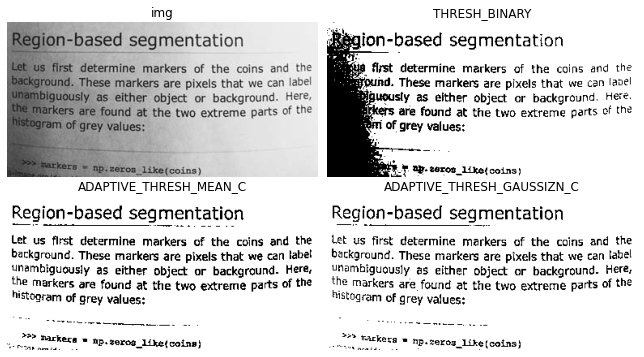

In [58]:
import skimage
import cv2
import matplotlib.pylab as plt
import seaborn as sns
from skimage import color
from skimage.data import coins
from skimage.data import page

img = page() # 191, 384 가중치 평균 계산 해보기!
maxvalue = 255
thresh = 126

ret, th01 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)

blockSize = 15
C = 20

th02 = cv2.adaptiveThreshold(img, maxvalue, cv2.ADAPTIVE_THRESH_MEAN_C, 
                             cv2.THRESH_BINARY, blockSize, C)

th03 = cv2.adaptiveThreshold(img, maxvalue, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                             cv2.THRESH_BINARY, blockSize, C)

title = ["img","THRESH_BINARY","ADAPTIVE_THRESH_MEAN_C", "ADAPTIVE_THRESH_GAUSSIZN_C"]
images = [img, th01, th02, th03]

plt.figure(figsize=(9,5))
for i in range(4):
    # 두줄, 한줄에 3개씩 출력, 그레이로
    plt.subplot(2,2,i+1), plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.axis("off")
    
plt.tight_layout(pad=0.9) #이미지 사이 여백 주기
plt.show()

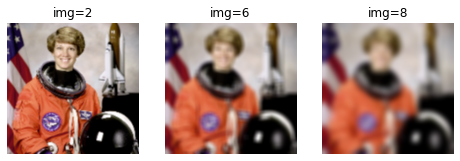

In [71]:
# 2-3. 이미지 샘플을 필터링 해보자
#  filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
# 이미지의 커널크기가 커지면 이미지가 점점 흐려진다
# 이미지 필터링은 필터, 커널작업으로 정방행렬 정의하고 커널을 이동시켜 같은 이미지와 곱한 결과값
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pylab as plt
import seaborn as sns
from skimage.data import astronaut
import numpy as np

image = astronaut()
image = cv2.resize(image, dsize=(150,150))

plt.figure(figsize=(8,3))
# 커널크기가 커지면 이미지가 흐려진다.
for i, k in enumerate([2,6,8,]):

    kernel = np.ones((k,k)) / k**2
    image = cv2.filter2D(image, -1, kernel=kernel)

    plt.subplot(1,3,i+1) 
    plt.imshow(image)
    plt.axis("off")
    plt.title("img={}".format(k))

plt.show()

2-4. 블러링 작업을 확인해보자 

- blur(src, kernel_size) -> 픽셀의 평균값으로 균일화 시킨다.
- medianBlur(src, kernel_size) ->중간값으로 균일화
- getGaussianKernel(ksize, sigma[, ktype]) -> retval : 가우시안 블러링
- GaussianBlur(src, kernel_size, sigmaX)
- bilateralFilter(src(원본이미지), d(커널크기), sigmaColor(색공간 표준편차),
- sigmaSpace(거리공간의 표준편차)[, dst[, borderType]]) -> dst : 양방향 필터링


Text(0.5, 1.0, 'img_bilateralFilter')

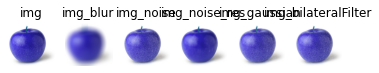

In [115]:
# 2-4. 평균값의 블러링 작업
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pylab as plt
import seaborn as sns
from skimage.data import astronaut
import numpy as np

# 1. 원본이미지
# image = astronaut()
image = cv2.imread('C:\\open_img\\myImg\\apple.jpg')

# 2. 블러 이미지
blur = cv2.blur(image, (100,100) ) #(x,y)의 영역의 평균값으로 해당 픽셀을 대처한다.

# 3. 잡음 적용 이미지
img_noise = image.copy()
np.random.seed(0)
N=50000
idx1 = np.random.randint(image.shape[0], size=N)
idx2 = np.random.randint(image.shape[1], size=N)

img_noise [idx1,idx2] = 255

# 4. 잡음 제거를 중앙값으로 블러링하기
img_noise_res = cv2.medianBlur(img_noise, 19)

# 5. 블러
img_g = cv2.GaussianBlur(img_noise,(9,9),19)  #원본이미지, 커널크기, 표준편차

# 6. bilateralFilter 를 사용
img_b = cv2.bilateralFilter(img_noise, 9, 75, 75)

#원본 이미지
plt.subplot(161) 
plt.imshow(image)
plt.axis("off")
plt.title("img")

#평균 블러 이미지
plt.subplot(162) 
plt.imshow(blur)
plt.axis("off")
plt.title("img_blur")

#잡음 이미지
plt.subplot(163) 
plt.imshow(img_noise)
plt.axis("off")
plt.title("img_noise")

#잡음 제거 이미지
plt.subplot(164) 
plt.imshow(img_noise_res)
plt.axis("off")
plt.title("img_noise_res")

#가우시안 이미지
plt.subplot(165) 
plt.imshow(img_g)
plt.axis("off")
plt.title("img_gaussian")

#가우시안 이미지
plt.subplot(166) 
plt.imshow(img_b)
plt.axis("off")
plt.title("img_bilateralFilter")

가우시안 블러링 가우시안 함수 G를 커널로 사용한다.
가우시안 커널은 가운데 위치 (x,y)와 커널 위치(x+u, y+v)의 거리차이 (u,v)가 클수록 가중치가 작아진다.
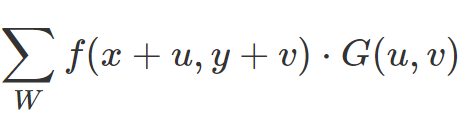

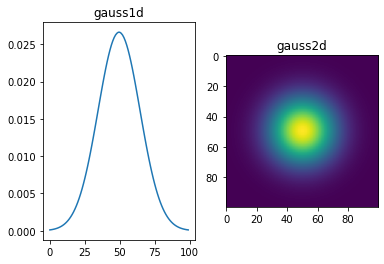

In [104]:
# 2-5 블러링 작업을 해보자
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pylab as plt
import seaborn as sns
from skimage.data import astronaut
import numpy as np

# 1. 원본이미지
# image = astronaut()
# image = cv2.imread('C:\\open_img\\myImg\\apple.jpg')

gauss1d = cv2.getGaussianKernel(100,15)
gauss2d = gauss1d @ gauss1d.T

plt.subplot(121) 
plt.plot(gauss1d)
plt.grid(False)
plt.title("gauss1d")

plt.subplot(122) 
# plt.plot(gauss2d)
plt.imshow(gauss2d)
plt.grid(False)
plt.title("gauss2d")
plt.show()

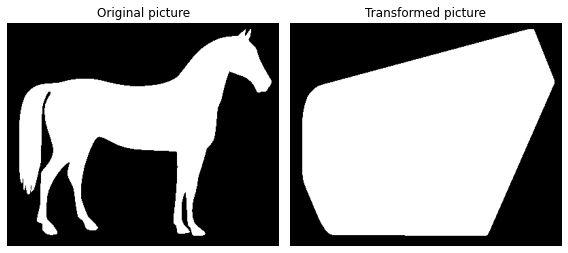

In [116]:
# 2-6. 이미지 변환 작업
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert

image = invert(data.horse())

chull = convex_hull_image(image)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].set_title('Original picture')
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_axis_off()

ax[1].set_title('Transformed picture')
ax[1].imshow(chull, cmap=plt.cm.gray)
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

In [120]:
# 2-7 형태 변환(morphological region)
'''
2진화로 변환한 이미지로 침식, 팽창, 그레디언트, 오프닝, 클로징 등의 작업을 할 때 같이 사용
getStructuringElement(shape, ksize[, anchor]) -> retval
shape : cv2.MORPH_RECT / cv2.MORPH_ELLIPSE / cv2.MORPH_CROSS
'''

cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

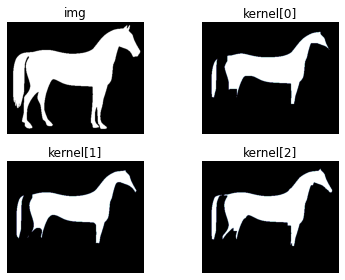

In [128]:
# 2-8. 침식 : 각 픽셀에 커널을 적용해서 커널 영역의 최솟값으로 해당 픽셀을 대처
# 이진화 작업은 0(검정)과 1(흰색)으로 이루어진다.
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image
from skimage.data import horse
from skimage.util import invert

img = horse().astype('uint8')
img = np.ones(img.shape) - img

size = (20,20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, size)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, size)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS, size)

title = [ "kernel[0]", "kernel[1]", "kernel[2]"]

#원본
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.title("img")

# 침식화 cv2.erode(src, kernel)
for i in range(3):
    res = cv2.erode(img, kernel[i]) 
#     res = cv2.dilate(img,kernel[i])
    plt.subplot(2,2,i+2)
    plt.imshow(res,  cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

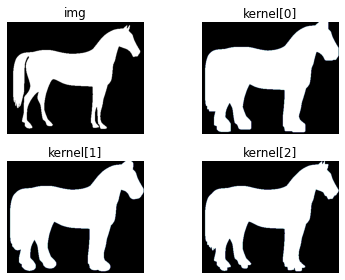

In [129]:
# 2-8. 침식 : 각 픽셀에 커널을 적용해서 커널 영역의 최솟값으로 해당 픽셀을 대처
# 이진화 작업은 0(검정)과 1(흰색)으로 이루어진다.
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image
from skimage.data import horse
from skimage.util import invert

img = horse().astype('uint8')
img = np.ones(img.shape) - img

size = (20,20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, size)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, size)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS, size)

title = [ "kernel[0]", "kernel[1]", "kernel[2]"]

#원본
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.title("img")

# 팽창 cv2.dilate(src, kernel)
for i in range(3):
#     res = cv2.erode(img, kernel[i]) 
    res = cv2.dilate(img,kernel[i])
    plt.subplot(2,2,i+2)
    plt.imshow(res,  cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

2-10. 그레디언트 
- 팽창으로 확장된 영역 - 침식으로 축소된 영역 = 영역
- 영억 -> 윤곽선 추출

- 오프닝 : 침식 -> 팽창을 적용 -> 결과 : 적용 영역이 둥글게 된다.
- (점, 작은 물체, 돌기)

- 클로즈 : 팽창 -> 침식 : 윤곽확인

- morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst
- op : cv2.MORPH_OPEN -> cv2.dilate(c2.erode(img))와 동일
       cv2.MORPH_CLOSE -> cv2.erode(cv2.dilate(img))와 동일
       cv2.MORPH_GRADIENT -> cv2.dilate() - cv2.erode()
       cv2.MORPH_TOPHAT -> openning(img)
       cv2.MORPH_BLACKHAT -> closing(img)
       


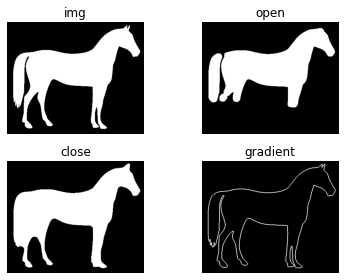

In [4]:
# 2-10. 그레디언트 : 팽창으로 확장된 영역 - 침식으로 축소된 영역 = 영역  --> 윤곽선을 추출
# 오프닝 : 침식 -> 팽창을 적용한다. 결과 : 적용영역이 둥글게 된다(점, 작은 물체, 돌기)
# 클로즈 : 팽창 -> 침식 : 윤곽 확인
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image
from skimage.data import horse
from skimage.util import invert
import numpy as np
import cv2

img = horse().astype('uint8')
img = np.ones(img.shape) - img

size = (20,20)
open = cv2.morphologyEx(img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, size))

close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, size))

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)))

title = [ "img", "open", "close", "gradient"]
images = [ img, open, close, gradient]

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],  cmap='gray')
    plt.title(title[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

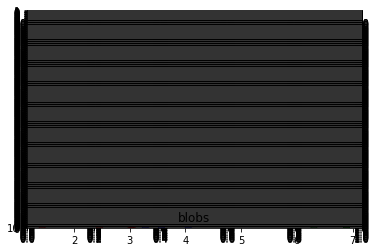

In [6]:
# 번외편
import matplotlib.pyplot as plt
from sklearn import datasets

base_color = ["r","g","b","y","k"]
# plt.subplots(figsize=(12,18))
plt.subplots(321)

data, target = datasets.make_blobs(n_samples=10, n_features=2,
                                centers=3, cluster_std=1.0, center_box=(-10.0,10.0),
                                  shuffle=True, random_state=None)
colors = [base_color[class_] for class_ in target]
plt.scatter(data.T[0], data.T[1], color=colors, alpha=0.5)
plt.title("blobs")
plt.show()